In [3]:
using Plots

# y = sin(x)

x = collect(-2*pi:0.1:2*pi)

126-element Array{Float64,1}:
 -6.283185307179586 
 -6.183185307179587 
 -6.083185307179586 
 -5.983185307179586 
 -5.883185307179586 
 -5.783185307179586 
 -5.683185307179587 
 -5.583185307179586 
 -5.483185307179586 
 -5.383185307179586 
 -5.283185307179586 
 -5.183185307179587 
 -5.083185307179586 
  ⋮                 
  5.116814692820414 
  5.216814692820414 
  5.316814692820415 
  5.416814692820415 
  5.5168146928204145
  5.616814692820414 
  5.716814692820414 
  5.816814692820415 
  5.916814692820415 
  6.0168146928204145
  6.116814692820414 
  6.216814692820414 

In [4]:
y = sin.(x)

126-element Array{Float64,1}:
  2.4492935982947064e-16
  0.09983341664682804   
  0.19866933079506163   
  0.29552020666133966   
  0.389418342308651     
  0.4794255386042032    
  0.5646424733950353    
  0.6442176872376913    
  0.7173560908995228    
  0.7833269096274837    
  0.8414709848078966    
  0.8912073600614353    
  0.9320390859672265    
  ⋮                     
 -0.9193285256646756    
 -0.8754521746884284    
 -0.8228285949687076    
 -0.761983583919032     
 -0.6935250847771222    
 -0.6181371122370332    
 -0.5365729180004347    
 -0.44964746453459964   
 -0.3582292822368268    
 -0.2632317913658007    
 -0.16560417544830916   
 -0.06632189735120045   

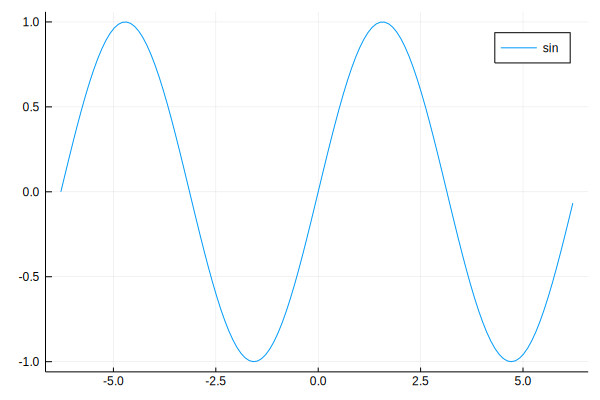

In [6]:
plot(x, y, label="sin")

In [7]:
using DelimitedFiles

A = readdlm("../dat/forbes.txt")

17×2 Array{Float64,2}:
 194.5  20.79
 194.3  20.79
 197.9  22.4 
 198.4  22.67
 199.4  23.15
 199.9  23.35
 200.9  23.89
 201.1  23.99
 201.4  24.02
 201.3  24.01
 203.6  25.14
 204.6  26.57
 209.5  28.49
 208.6  27.76
 210.7  29.04
 211.9  29.88
 212.2  30.06

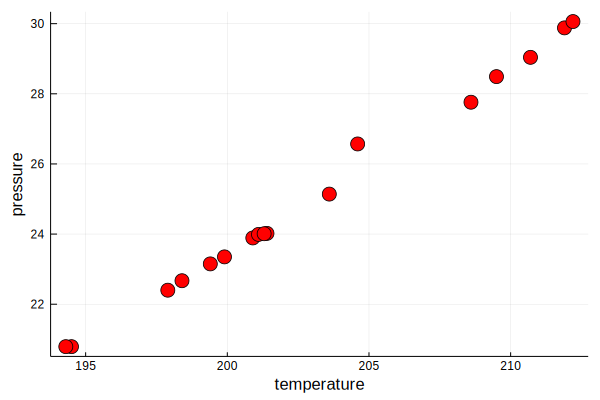

In [13]:
scatter(A[:,1], A[:,2], label="", xlabel="temperature", ylabel="pressure", markersize=8, color=:red)

In [14]:
# Linear Regression: pressure = θ_0 + θ_1 * temperature (y = θ_0 + θ_1 x) => θ = [θ_0; θ_1] = ?
x = A[:,1]

17-element Array{Float64,1}:
 194.5
 194.3
 197.9
 198.4
 199.4
 199.9
 200.9
 201.1
 201.4
 201.3
 203.6
 204.6
 209.5
 208.6
 210.7
 211.9
 212.2

In [17]:
N = length(x)

17

In [18]:
ones(N)

17-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [25]:
X = hcat(ones(N), x)
y = A[:,2]

17-element Array{Float64,1}:
 20.79
 20.79
 22.4 
 22.67
 23.15
 23.35
 23.89
 23.99
 24.02
 24.01
 25.14
 26.57
 28.49
 27.76
 29.04
 29.88
 30.06

In [27]:
# Using the normal equation to estimate θ
θ = inv(X'*X)*X'*y

2-element Array{Float64,1}:
 -81.06372712863569 
   0.522892400784523

In [28]:
x_208 = [1 208]
y_208 = x_208 * θ

1-element Array{Float64,1}:
 27.697892234545094

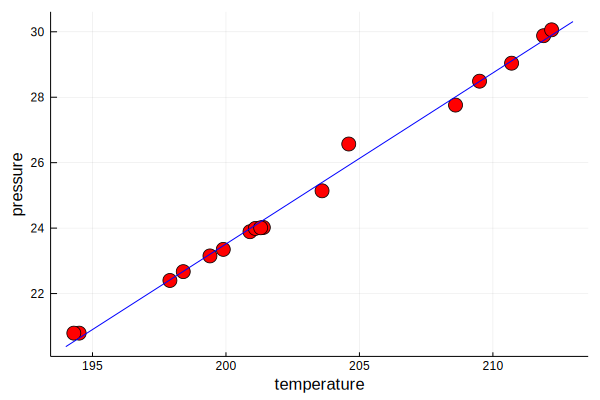

In [39]:
# y = x * θ // v = u * θ

u = collect(194:0.05:213)
v = hcat(ones(length(u)), u) * θ
scatter(A[:,1], A[:,2], label="", xlabel="temperature", ylabel="pressure", markersize=8, color=:red)
plot!(u, v, label="", color=:blue)

In [40]:
# X: design matrix of size Nx(D+1), y: output vector of length N.
function train(X::Array{Float64,2}, y::Array{Float64})::Array{Float64}
    inv(X'*X)*X'*y
end

train (generic function with 1 method)

In [42]:
train(X, y)

2-element Array{Float64,1}:
 -81.06372712863569 
   0.522892400784523

In [44]:
# linear regression, x is a row vector, θ is a column vector of parameters.
function predict(x::Array{Float64}, θ::Array{Float64})
    x * θ
end

predict (generic function with 2 methods)

In [47]:
predict([1 208], θ)

1-element Array{Float64,1}:
 27.697892234545094

In [55]:
B = readdlm("../dat/wdbc.txt", ',')
y = B[:,2]
N = length(y)
X = hcat(ones(N), B[:,3:12])
θ = train(X, y)

11-element Array{Float64,1}:
  3.0520842486138138  
 -0.4900122933442187  
 -0.021973203109976705
  0.054974677835791345
  0.000954771411296448
 -1.9408621097488001  
 -0.09726080785349134 
 -0.8097675232578132  
 -6.431011461417771   
 -1.011900043309533   
  0.11929241921479505 

In [56]:
x_100 = X[100, :]

11-element Array{Float64,1}:
   1.0    
  14.42   
  19.77   
  94.48   
 642.5    
   0.09752
   0.1141 
   0.09388
   0.05839
   0.1879 
   0.0639 

In [62]:
y_100 = y[100]
println("y_100 = $(y_100)")
prediction_100 = predict(x_100', θ)
println("prediction_100 = $(prediction_100)")

y_100 = 0.0
prediction_100 = 0.524733648805025


In [76]:
function classify(x::Array{Float64}, θ::Array{Float64}, ϵ::Float64 = 0.5)::Int
    if predict(x', θ) < ϵ
        0
    else 
        1
    end
end

function classify(X::Array{Float64,2}, θ::Array{Float64}, ϵ::Float64 = 0.5)::Array{Int}
    N = size(X,1)
    map(i -> classify(X[i,:], θ, ϵ), collect(1:N))
end



classify (generic function with 5 methods)

In [71]:
classify(x_100, θ)
classify(X, θ)

569-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 1
 0
 0
 ⋮
 1
 1
 1
 1
 1
 0
 0
 0
 0
 0
 0
 1

In [82]:
function evaluate(X, y, θ, ϵ = 0.5)
    prediction = classify(X, θ, ϵ)
    sum(prediction .== y)/length(y)
end

evaluate (generic function with 2 methods)

In [77]:
accuracy = evaluate(X, y, θ)
println("Training accuracy = $(accuracy)")

Training accuracy = 0.9384885764499121


In [86]:
ϵs = collect(0.4:0.01:0.8)
as = map(i -> evaluate(X, y, θ, ϵs[i]), 1:length(ϵs))

41-element Array{Float64,1}:
 0.9103690685413005
 0.9191564147627417
 0.9244288224956063
 0.929701230228471 
 0.9279437609841827
 0.929701230228471 
 0.9279437609841827
 0.9332161687170475
 0.9367311072056239
 0.9367311072056239
 0.9384885764499121
 0.9402460456942003
 0.9384885764499121
 ⋮                 
 0.8910369068541301
 0.8804920913884007
 0.875219683655536 
 0.8646748681898067
 0.8611599297012302
 0.8611599297012302
 0.8506151142355008
 0.836555360281195 
 0.827768014059754 
 0.8189806678383128
 0.8031634446397188
 0.7943760984182777

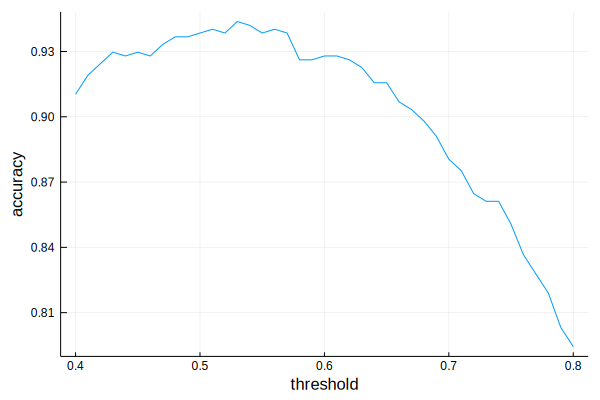

In [90]:
plot(ϵs, as, xlabel="threshold", ylabel="accuracy", label="")

In [92]:
println("Best ϵ = $(ϵs[argmax(as)])")

Best ϵ = 0.53
